<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 110.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 41.7 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 131.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 113.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 104.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 15.8 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-01-10 13:43:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.2MB/s    in 2.7s    

2025-01-10 13:43:57 (57.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


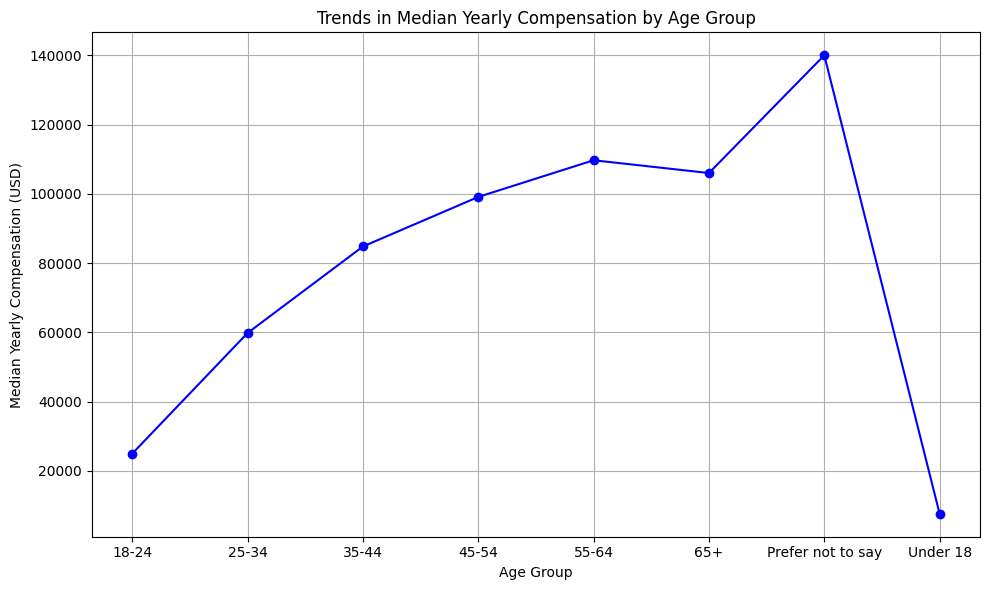

In [8]:
# Convert the 'Age' column to categorical type based on age groups
age_mapping = {
    'Under 18 years old': 'Under 18', '18-24 years old': '18-24', '25-34 years old': '25-34',
    '35-44 years old': '35-44', '45-54 years old': '45-54', '55-64 years old': '55-64',
    '65 years or older': '65+', 'Prefer not to say': 'Prefer not to say'
}
df['AgeGroup'] = df['Age'].map(age_mapping)

# Calculate the median compensation for each age group
median_compensation = df.groupby('AgeGroup')['ConvertedCompYearly'].median().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_compensation['AgeGroup'], median_compensation['ConvertedCompYearly'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Trends in Median Yearly Compensation by Age Group')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


['Under 18' '35-44' '45-54' '18-24' '25-34' '55-64' 'Prefer not to say'
 '65+']
    ResponseId                                         MainBranch  \
1            2                     I am a developer by profession   
6            7  I am not primarily a developer, but I write co...   
9           10                     I am a developer by profession   
10          11  I used to be a developer by profession, but no...   
12          13                     I am a developer by profession   

                Age                                         Employment  \
1   35-44 years old                                Employed, full-time   
6   35-44 years old                                Employed, full-time   
9   35-44 years old  Independent contractor, freelancer, or self-em...   
10  35-44 years old                                Employed, full-time   
12  35-44 years old                                Employed, full-time   

                              RemoteWork   Check  \
1       

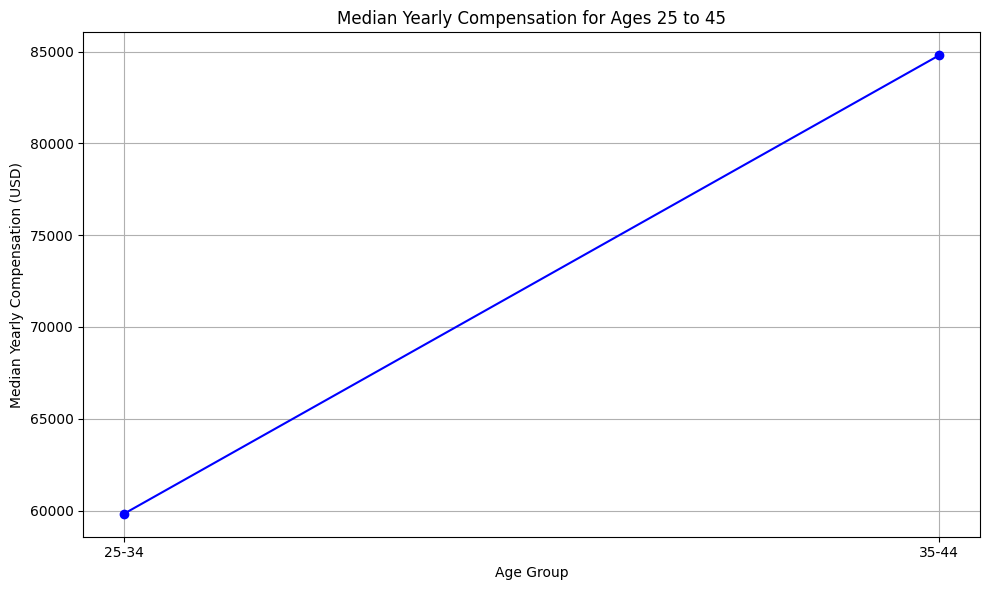

In [9]:
## Write your code here
# Convert the 'Age' column to categorical type based on age groups
age_mapping = {
    'Under 18 years old': 'Under 18', '18-24 years old': '18-24', '25-34 years old': '25-34',
    '35-44 years old': '35-44', '45-54 years old': '45-54', '55-64 years old': '55-64',
    '65 years or older': '65+', 'Prefer not to say': 'Prefer not to say'
}
df['AgeGroup'] = df['Age'].map(age_mapping)

# Display the unique values in the 'AgeGroup' column to verify mapping
print(df['AgeGroup'].unique())

# Filter data for ages 25-34 and 35-44
age_filtered_df = df[df['AgeGroup'].isin(['25-34', '35-44'])]

# Display the filtered DataFrame to verify filtering
print(age_filtered_df.head())

# Calculate the median compensation for each age group
median_compensation = age_filtered_df.groupby('AgeGroup')['ConvertedCompYearly'].median().reset_index()

# Display the median compensation data to verify grouping
print(median_compensation)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_compensation['AgeGroup'], median_compensation['ConvertedCompYearly'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Median Yearly Compensation for Ages 25 to 45')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.



Number of NaN values in 'YearsCode': 6391
Number of NaN values in 'YearsCodePro': 16733

Number of NaN values in 'YearsCodePro': 16733

Data types after cleaning:
YearsCodePro    float64
dtype: object

Cleaned DataFrame:
    ResponseId                                         MainBranch  \
1            2                     I am a developer by profession   
2            3                     I am a developer by profession   
6            7  I am not primarily a developer, but I write co...   
9           10                     I am a developer by profession   
11          12                     I am a developer by profession   

                Age                                         Employment  \
1   35-44 years old                                Employed, full-time   
2   45-54 years old                                Employed, full-time   
6   35-44 years old                                Employed, full-time   
9   35-44 years old  Independent contractor, freelancer, or self-em

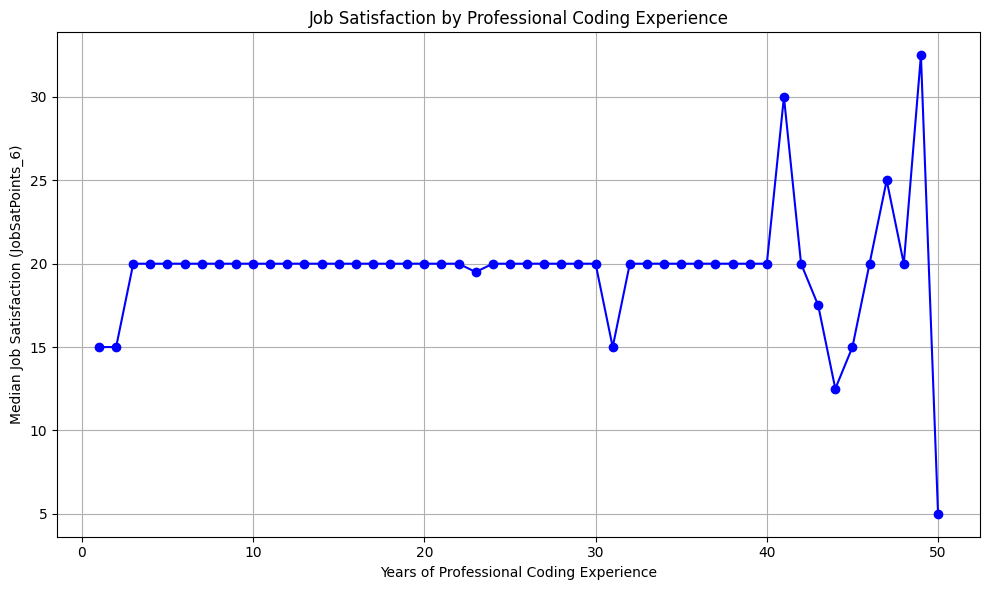

In [11]:
## Write your code here

# Convert 'YearsCode' and 'YearsCodePro' to numeric, coerce errors to handle non-numeric values
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Check for NaN values after conversion
print("\nNumber of NaN values in 'YearsCode':", df['YearsCode'].isna().sum())
print("Number of NaN values in 'YearsCodePro':", df['YearsCodePro'].isna().sum())

# Drop rows with NaN values in 'YearsCode' and 'YearsCodePro' if needed
df_cleaned = df.dropna(subset=['YearsCode', 'YearsCodePro'])

# Define a mapping for descriptive strings
years_code_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Replace descriptive strings with numeric values
df['YearsCodePro'] = df['YearsCodePro'].replace(years_code_mapping)

# Convert 'YearsCodePro' to numeric, coerce errors to handle any remaining non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Check for NaN values after conversion
print("\nNumber of NaN values in 'YearsCodePro':", df['YearsCodePro'].isna().sum())

# Drop rows with NaN values in 'YearsCodePro' if needed
df_cleaned = df.dropna(subset=['YearsCodePro'])

# Verify data types after cleaning
print("\nData types after cleaning:")
print(df_cleaned[['YearsCodePro']].dtypes)

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned.head())


# Calculate the median job satisfaction for each experience level
median_job_satisfaction = df_cleaned.groupby('YearsCodePro')['JobSatPoints_6'].median().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_job_satisfaction['YearsCodePro'], median_job_satisfaction['JobSatPoints_6'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)')
plt.title('Job Satisfaction by Professional Coding Experience')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


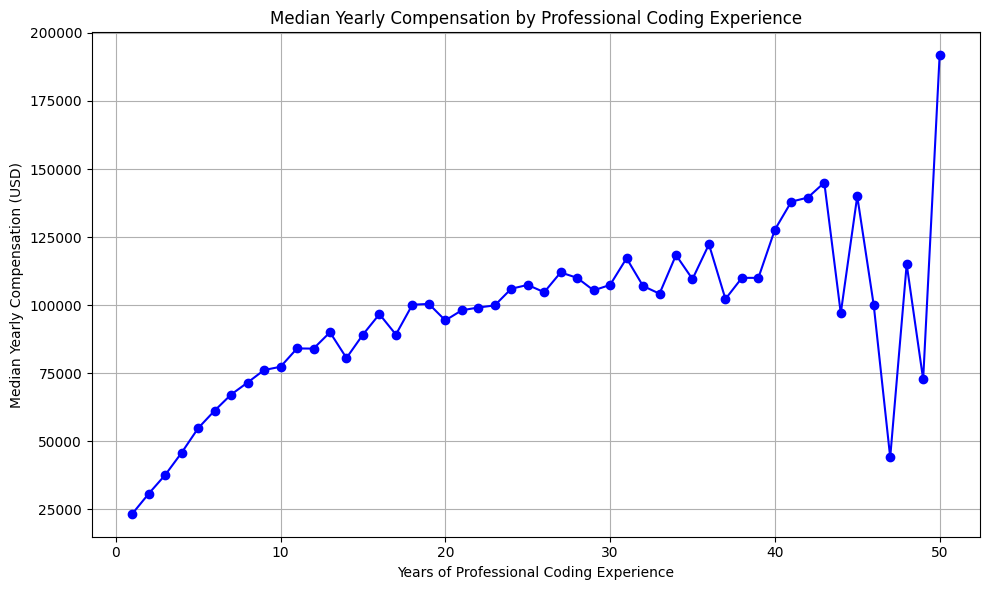

In [12]:
## Write your code here
# Calculate the median compensation for each experience level
median_compensation_by_experience = df_cleaned.groupby('YearsCodePro')['ConvertedCompYearly'].median().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_compensation_by_experience['YearsCodePro'], median_compensation_by_experience['ConvertedCompYearly'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Median Yearly Compensation by Professional Coding Experience')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


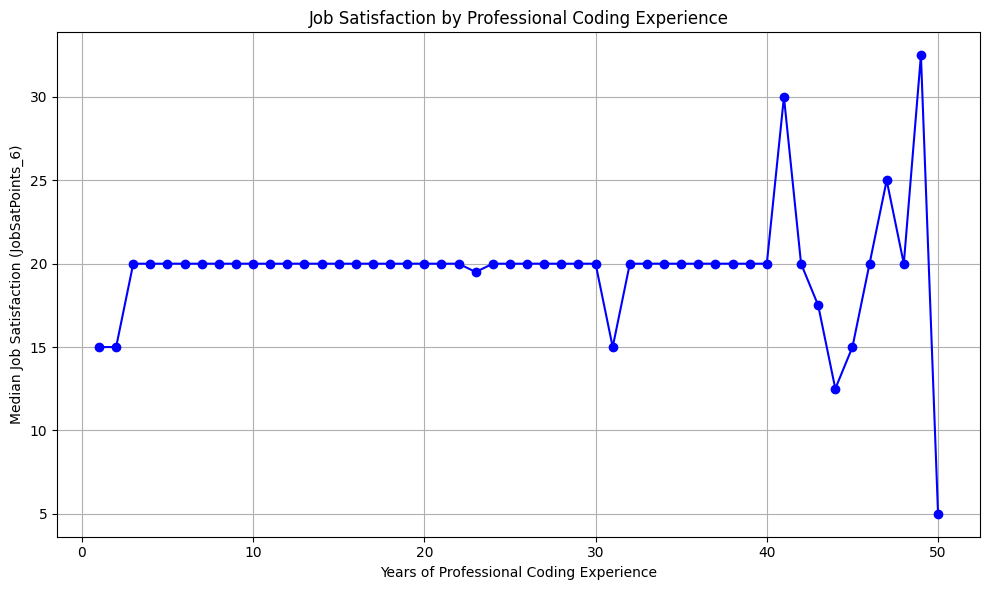

In [13]:
## Write your code here
# Calculate the median job satisfaction for each experience level
median_job_satisfaction = df_cleaned.groupby('YearsCodePro')['JobSatPoints_6'].median().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_job_satisfaction['YearsCodePro'], median_job_satisfaction['JobSatPoints_6'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)')
plt.title('Job Satisfaction by Professional Coding Experience')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

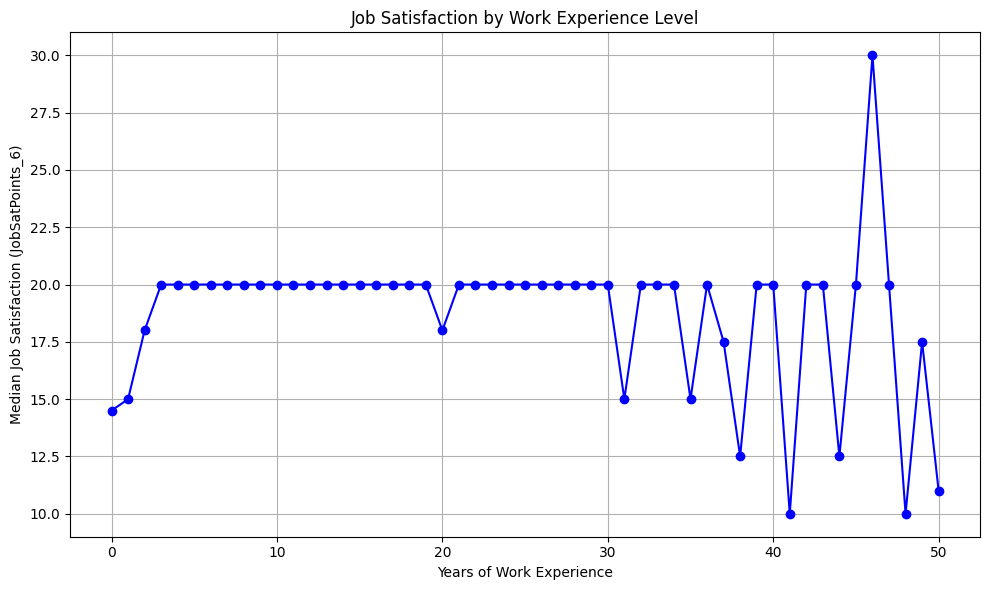

In [14]:
# Calculate the median job satisfaction for each experience level
median_job_satisfaction = df_cleaned.groupby('WorkExp')['JobSatPoints_6'].median().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_job_satisfaction['WorkExp'], median_job_satisfaction['JobSatPoints_6'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)')
plt.title('Job Satisfaction by Work Experience Level')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
